In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [2]:
df = pd.read_csv("diabetes_dataset.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
x = df.drop(["Outcome"], axis=1)
y = df.Outcome

In [4]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
model = DecisionTreeClassifier(max_depth=3)
model = model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
# yPred


In [6]:
cf = confusion_matrix(yTest, yPred)
print(cf)
tn, fp, fn, tp = cf.ravel() 
print(f"Accuracy: {((tp + tn)/(tp+tn+fp+fn))}")

[[83 16]
 [21 34]]
Accuracy: 0.7597402597402597


In [7]:
features = x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

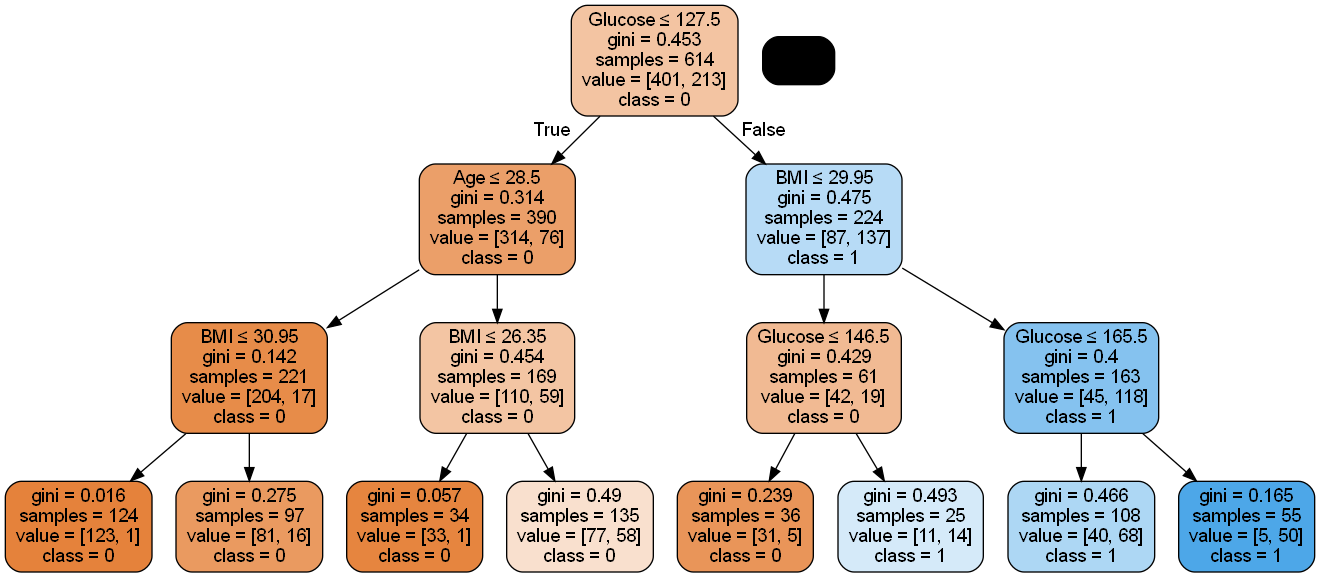

In [8]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("output.png")
Image(graph.create_png())